In [1]:
import pandas as pd
import numpy as np
import sklearn
import os

In [104]:
filepath ='/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel Inception/Results_with_Village_code_BF.txt'

In [105]:
df = pd.read_csv(filepath,delim_whitespace=True, header=None)

In [107]:
df.columns = ['actual_y', 'predicted_y','village_code']

In [108]:
df['actual_y'] = df['actual_y'].astype(int)
df['predicted_y'] = df['predicted_y'].astype(int)
df['village_code'] = df['village_code'].astype(int)

In [109]:
df.head()

,actual_y,predicted_y,village_code
0,0,0,251893
1,0,0,392629
2,0,0,531900
3,0,0,522435
4,0,0,253507


In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [68]:
print(classification_report(df['actual_y'], df['predicted_y']))
print(accuracy_score(df['actual_y'], df['predicted_y']))
print(confusion_matrix(df['actual_y'], df['predicted_y']))

             precision    recall  f1-score   support

          0       0.83      1.00      0.90     32143
          1       0.00      0.00      0.00      3367
          2       0.59      0.12      0.19      4042

avg / total       0.73      0.82      0.75     39552

0.8211974110032363
[[32009     0   134]
 [ 3177     0   190]
 [ 3571     0   471]]


In [70]:
df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')

In [4]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



-1
Confusion matrix, without normalization
[[ 3498 10727     1]
 [  889 13213     1]
 [  310  2131    18]]
Normalized confusion matrix
[[2.45887811e-01 7.54041895e-01 7.02938282e-05]
 [6.30362334e-02 9.36892860e-01 7.09068992e-05]
 [1.26067507e-01 8.66612444e-01 7.32004880e-03]]
-1
Confusion matrix, without normalization
[[17103  1711  2433]
 [ 3726  3826   557]
 [  746    61   714]]
Normalized confusion matrix
[[0.8049607  0.08052902 0.11451028]
 [0.45948946 0.47182143 0.06868911]
 [0.4904668  0.04010519 0.46942801]]
-1
Confusion matrix, without normalization
[[10678    74   829]
 [ 5293   100  1557]
 [ 6569    42  5763]]
Normalized confusion matrix
[[0.92202746 0.00638978 0.07158276]
 [0.76158273 0.01438849 0.22402878]
 [0.53087118 0.00339421 0.4657346 ]]
-1
Confusion matrix, without normalization
[[25255     0     0]
 [ 2575     0     0]
 [ 2919     0     1]]
Normalized confusion matrix
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 

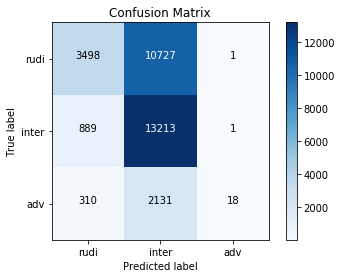

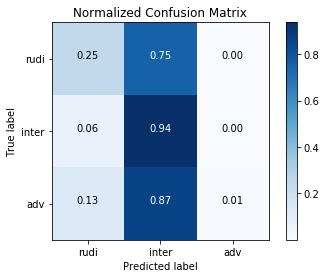

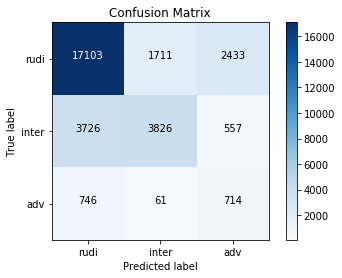

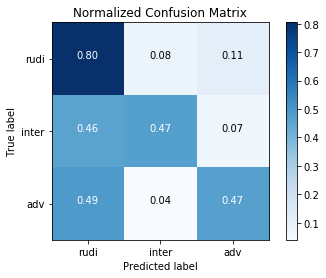

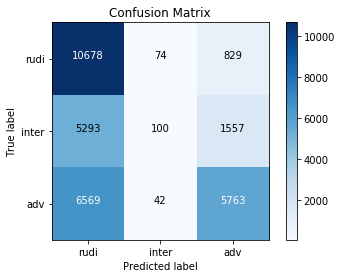

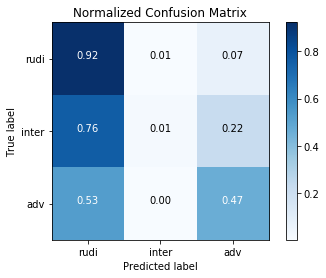

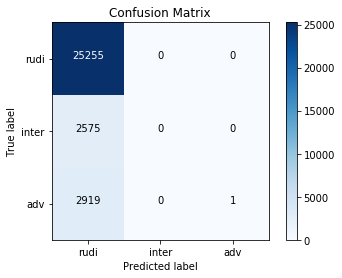

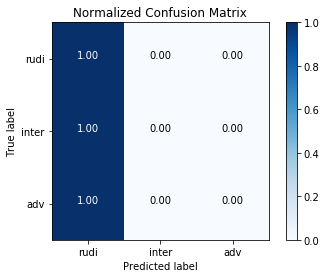

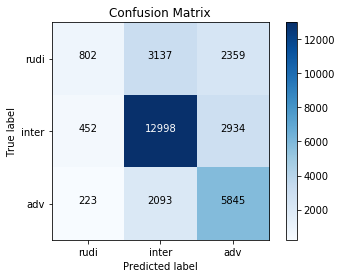

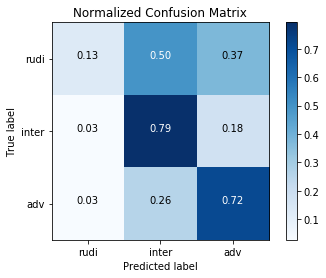

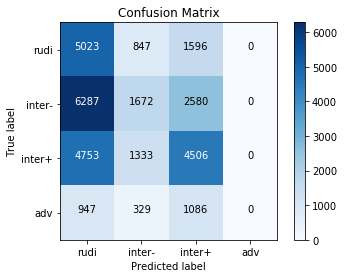

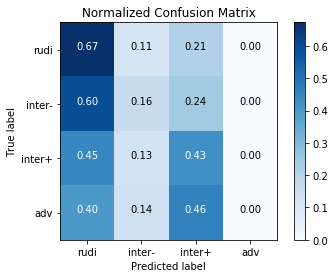

In [29]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel Inception 2'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print(label.find('CHH'))
            if (label.find('CHH')>0):
                print(label.find('CHH'))
                class_names=['rudi', 'inter-','inter+', 'adv']
                cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
                plt.figure()
                plot_confusion_matrix(cm,class_names,normalize=False,title='Confusion Matrix')
                file_path_new = os.path.join(dir_path,(label+'.png'))
                file_path_new_2 = os.path.join(dir_path,(label+'_NCM.png'))
            
                plt.savefig(file_path_new)
            
                plt.figure()
                plot_confusion_matrix(cm,class_names,normalize=True,title='Normalized Confusion Matrix')
                file_path_new = os.path.join(dir_path,(label+'.png'))
                plt.savefig(file_path_new_2)
            else:
                class_names=['rudi', 'inter', 'adv']
                cm = confusion_matrix(df1['actual_y'], df1['predicted_y'])
                plt.figure()
                plot_confusion_matrix(cm,class_names,normalize=False,title='Confusion Matrix')
                file_path_new = os.path.join(dir_path,(label+'.png'))
                file_path_new_2 = os.path.join(dir_path,(label+'_NCM.png'))
            
                plt.savefig(file_path_new)
            
                plt.figure()
                plot_confusion_matrix(cm,class_names,normalize=True,title='Normalized Confusion Matrix')
                file_path_new = os.path.join(dir_path,(label+'.png'))
                plt.savefig(file_path_new_2)
            

In [ ]:
#For classification report and accuracy score

In [26]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel Resnet50'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_ResNet_CHH', ' :', 0.45368779576212437)
('Classification Report for ', 'Results_ResNet_CHH')
             precision    recall  f1-score   support

          0       0.53      0.15      0.23      8034
          1       0.43      0.53      0.47     11331
          2       0.46      0.70      0.56     11304
          3       0.00      0.00      0.00      2508

avg / total       0.43      0.45      0.41     33177

-----------------------------------------------------------
('Accuracy for ', 'Results_ResNet_EMP', ' :', 0.6564107218490954)
('Classification Report for ', 'Results_ResNet_EMP')
             precision    recall  f1-score   support

          0       0.72      0.59      0.65     15273
          1       0.62      0.82      0.70     15108
          2       0.67      0.09      0.16      2673

avg / total       0.67      0.66      0.64     33054

-----------------------------------------------------------
('Accuracy for ', 'Results_ResNet_MSL', ' :', 0.6480

In [28]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel Inception 2'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_EMP', ' :', 0.5433610497596466)
('Classification Report for ', 'Results_EMP')
             precision    recall  f1-score   support

          0       0.74      0.25      0.37     14226
          1       0.51      0.94      0.66     14103
          2       0.90      0.01      0.01      2459

avg / total       0.65      0.54      0.47     30788

-----------------------------------------------------------
('Accuracy for ', 'Results_FC', ' :', 0.7009424490721249)
('Classification Report for ', 'Results_FC')
             precision    recall  f1-score   support

          0       0.79      0.80      0.80     21247
          1       0.68      0.47      0.56      8109
          2       0.19      0.47      0.27      1521

avg / total       0.73      0.70      0.71     30877

-----------------------------------------------------------
('Accuracy for ', 'Results_MSL', ' :', 0.5352208380520951)
('Classification Report for ', 'Results_MSL')
             precision    recal

In [30]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel ResNetFullData'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_ResNet_CHH', ' :', 0.43936687811787895)
('Classification Report for ', 'Results_ResNet_CHH')
             precision    recall  f1-score   support

          0       0.50      0.17      0.26      7765
          1       0.41      0.53      0.46     10862
          2       0.46      0.63      0.53     11263
          3       0.00      0.00      0.00      2584

avg / total       0.41      0.44      0.40     32474

-----------------------------------------------------------
('Accuracy for ', 'Results_ResNet_EMP', ' :', 0.6478105561372175)
('Classification Report for ', 'Results_ResNet_EMP')
             precision    recall  f1-score   support

          0       0.64      0.71      0.67     15147
          1       0.65      0.68      0.67     14865
          2       0.59      0.10      0.18      2462

avg / total       0.64      0.65      0.63     32474

-----------------------------------------------------------
('Accuracy for ', 'Results_ResNet_MSL', ' :', 0.6781

In [31]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel_Augmented'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_ResNet_BF', ' :', 0.7162037322165424)
('Classification Report for ', 'Results_ResNet_BF')
             precision    recall  f1-score   support

          0       0.84      0.84      0.84     26699
          1       0.13      0.08      0.10      2804
          2       0.13      0.16      0.14      2971

avg / total       0.71      0.72      0.71     32474

-----------------------------------------------------------


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/Sentinel_ResNet_weights'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Results_ResNet_BF', ' :', 0.7986540724869481)
('Classification Report for ', 'Results_ResNet_BF')
             precision    recall  f1-score   support

          0       0.87      0.92      0.90     27166
          1       0.00      0.00      0.00      2782
          2       0.31      0.42      0.36      3189

avg / total       0.75      0.80      0.77     33137

-----------------------------------------------------------


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/Resnet/chh'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Test_Results_CHH-01', ' :', 0.4418333228187496)
('Classification Report for ', 'Test_Results_CHH-01')
             precision    recall  f1-score   support

          0       0.56      0.09      0.16      7693
          1       0.40      0.64      0.49     10622
          2       0.48      0.60      0.53     10897
          3       0.00      0.00      0.00      2490

avg / total       0.44      0.44      0.39     31702

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_CHH-03', ' :', 0.4367547788783042)
('Classification Report for ', 'Test_Results_CHH-03')
             precision    recall  f1-score   support

          0       0.50      0.11      0.19      7693
          1       0.42      0.52      0.46     10622
          2       0.44      0.69      0.54     10897
          3       0.00      0.00      0.00      2490

avg / total       0.41      0.44      0.39     31702

--------------------------------------------------------

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.45      0.24      0.31      7693
          1       0.42      0.47      0.44     10622
          2       0.46      0.66      0.54     10897
          3       0.00      0.00      0.00      2490

avg / total       0.41      0.44      0.41     31702

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_CHH-02', ' :', 0.44230647908649295)
('Classification Report for ', 'Test_Results_CHH-02')
             precision    recall  f1-score   support

          0       0.53      0.10      0.17      7693
          1       0.41      0.58      0.48     10622
          2       0.47      0.65      0.54     10897
          3       0.00      0.00      0.00      2490

avg / total       0.43      0.44      0.39     31702

-----------------------------------------------------------


In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/inceptionv3/msw'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Test_Results_MSW-02', ' :', 0.6529491589610882)
('Classification Report for ', 'Test_Results_MSW-02')
             precision    recall  f1-score   support

          0       0.55      0.20      0.29      6427
          1       0.70      0.82      0.76     17084
          2       0.57      0.66      0.61      8176

avg / total       0.64      0.65      0.63     31687

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_MSW-01', ' :', 0.6508031684918105)
('Classification Report for ', 'Test_Results_MSW-01')
             precision    recall  f1-score   support

          0       0.57      0.17      0.26      6427
          1       0.71      0.81      0.76     17084
          2       0.55      0.69      0.62      8176

avg / total       0.64      0.65      0.62     31687

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_MSW-04', ' :', 0.6505506990248366)
('Classification Report for ', 'Tes

In [6]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/inceptionv3/emp'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            

('Accuracy for ', 'Test_Results_EMP-01', ' :', 0.6676648594124323)
('Classification Report for ', 'Test_Results_EMP-01')
             precision    recall  f1-score   support

          0       0.70      0.69      0.69     14698
          1       0.64      0.77      0.70     14292
          2       0.00      0.00      0.00      2734

avg / total       0.61      0.67      0.64     31724

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_EMP-00', ' :', 0.6680431219266171)
('Classification Report for ', 'Test_Results_EMP-00')
             precision    recall  f1-score   support

          0       0.70      0.69      0.69     14698
          1       0.64      0.78      0.70     14292
          2       0.00      0.00      0.00      2734

avg / total       0.61      0.67      0.64     31724

-----------------------------------------------------------
('Accuracy for ', 'Test_Results_EMP-04', ' :', 0.6521560963308536)
('Classification Report for ', 'Tes

In [15]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/Resnetweights/BF'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            print(f1sc)

('Accuracy for ', 'Test_Results_BF', ' :', 0.7268750196707897)
('Classification Report for ', 'Test_Results_BF')
             precision    recall  f1-score   support

          0       0.90      0.80      0.85     26037
          1       0.21      0.47      0.29      2659
          2       0.38      0.34      0.36      3077

avg / total       0.79      0.73      0.75     31773

-----------------------------------------------------------
0.7268750196707897


In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = '/home/ictd/Desktop/Arpit/Satellite project/predictions/LANDSAT/Resnetweights/MSW'
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            print(f1sc)

('Accuracy for ', 'Test_Results_MSW-02', ' :', 0.634866033389087)
('Classification Report for ', 'Test_Results_MSW-02')
             precision    recall  f1-score   support

          0       0.42      0.55      0.47      6427
          1       0.84      0.62      0.71     17084
          2       0.56      0.74      0.64      8176

avg / total       0.68      0.63      0.65     31687

-----------------------------------------------------------
0.634866033389087
('Accuracy for ', 'Test_Results_MSW-01', ' :', 0.621327358222615)
('Classification Report for ', 'Test_Results_MSW-01')
             precision    recall  f1-score   support

          0       0.41      0.54      0.47      6427
          1       0.86      0.58      0.69     17084
          2       0.54      0.77      0.63      8176

avg / total       0.69      0.62      0.63     31687

-----------------------------------------------------------
0.621327358222615
('Accuracy for ', 'Test_Results_MSW-04', ' :', 0.5767349386183609)
(

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\LANDSAT\Village - Resnetweights\BF"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            print(f1sc)

Accuracy for  Test_Results_BF-00  : 0.6328329084442765
Classification Report for  Test_Results_BF-00
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     26037
           1       0.17      0.60      0.26      2659
           2       0.35      0.39      0.37      3077

   micro avg       0.63      0.63      0.63     31773
   macro avg       0.48      0.55      0.47     31773
weighted avg       0.80      0.63      0.69     31773

-----------------------------------------------------------
0.6328329084442765
Accuracy for  Test_Results_BF-01  : 0.6387498819752621
Classification Report for  Test_Results_BF-01
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     26037
           1       0.17      0.65      0.27      2659
           2       0.39      0.35      0.37      3077

   micro avg       0.64      0.64      0.64     31773
   macro avg       0.49      0.56      0.47     31773
weighted avg

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\LANDSAT\Village - Landsat7Avg2010-12\bf"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            print(f1sc)

Accuracy for  Train_Results_BF-00  : 0.5899273790436669
Classification Report for  Train_Results_BF-00
              precision    recall  f1-score   support

           0       0.93      0.61      0.73     26278
           1       0.16      0.64      0.25      2522
           2       0.28      0.41      0.34      3009

   micro avg       0.59      0.59      0.59     31809
   macro avg       0.46      0.55      0.44     31809
weighted avg       0.81      0.59      0.66     31809

-----------------------------------------------------------
0.5899273790436669
Accuracy for  Train_Results_BF-01  : 0.6748404539595712
Classification Report for  Train_Results_BF-01
              precision    recall  f1-score   support

           0       0.92      0.72      0.80     26278
           1       0.19      0.55      0.28      2522
           2       0.32      0.42      0.36      3009

   micro avg       0.67      0.67      0.67     31809
   macro avg       0.48      0.56      0.48     31809
weighted

In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import itertools
from itertools import product

direc = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\predictions\LANDSAT\Village - Landsat7Median2010-12\bf"
for dir_path, dir_name_list, file_name_list in os.walk(direc):
       for file_name in file_name_list:
            file_path = os.path.join(dir_path, file_name)
            label = file_name[:-4]
            df = pd.read_csv(file_path,delim_whitespace=True, header=None)
            df.columns = ['actual_y', 'predicted_y','village_code']
            df['actual_y'] = df['actual_y'].astype(int)
            df['predicted_y'] = df['predicted_y'].astype(int)
            df['village_code'] = df['village_code'].astype(int)
            df1 = df.drop_duplicates(subset=['actual_y', 'predicted_y','village_code'], keep='first')
            print('Accuracy for ',label,' :', accuracy_score(df1['actual_y'], df1['predicted_y']))
            print('Classification Report for ',label)
            print(classification_report(df1['actual_y'], df1['predicted_y']))
            print('-----------------------------------------------------------')
            f1sc=f1_score(df1['actual_y'], df1['predicted_y'],average='micro')
            print(f1sc)

Accuracy for  Train_Results_BF-00  : 0.6910979973632997
Classification Report for  Train_Results_BF-00
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     26297
           1       0.19      0.58      0.29      2533
           2       0.34      0.32      0.33      3028

   micro avg       0.69      0.69      0.69     31858
   macro avg       0.48      0.55      0.48     31858
weighted avg       0.80      0.69      0.73     31858

-----------------------------------------------------------
0.6910979973632997
Accuracy for  Train_Results_BF-01  : 0.6460229769602611
Classification Report for  Train_Results_BF-01
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     26297
           1       0.19      0.59      0.28      2533
           2       0.27      0.40      0.32      3028

   micro avg       0.65      0.65      0.65     31858
   macro avg       0.46      0.56      0.46     31858
weighted

ValueError: Length mismatch: Expected axis has 34048 elements, new values have 3 elements